In [1]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/Users/lipang/Library/Python/3.8/lib/python/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sentences_list = []

file1 = open('house_mouse.txt', 'r')
sentences1 = file1.readlines()
  
for sentence in sentences1:
    sentences_list.append(sentence.strip())

file1 = open('computer_mouse.txt', 'r')
sentences2 = file1.readlines()

for sentence in sentences2:
    sentences_list.append(sentence.strip())

In [3]:
tokenized_sentences = []

for sentence in sentences_list:
    marked_text = "[CLS] " + sentence + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    tokenized_sentences.append(tokenized_text)

In [4]:
embeddings_list = []

target_word = "mouse"
target_indexes = []

model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)
model.eval()

for tokenized_sentence in tokenized_sentences:

    target_indexes.append(tokenized_sentence.index(target_word))

    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_sentence)
    tokens_tensor = torch.tensor([indexed_tokens])
    
    with torch.no_grad():
        outputs = model(tokens_tensor)
        hidden_states = outputs[2]

        '''
        hidden_states has 4 dimensions:
        1. The layer number (13 layers)
        2. The batch number (sentences) [removed]
        3. The word / token number (tokens in sentence)
        4. The hidden unit / feature number (768 features) 
        '''

    token_embeddings = torch.stack(hidden_states, dim=0)
    token_embeddings = torch.squeeze(token_embeddings, dim=1)

    embeddings_list.append(token_embeddings)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
target_embeddings = []

for i in range(len(target_indexes)):
    target_embeddings.append(embeddings_list[i].numpy()[12][target_indexes[i]])

In [6]:
similarities = []
sentence_numbers = []

for i in range(len(target_embeddings)):
    similarities.append(1 - spatial.distance.cosine(target_embeddings[0], target_embeddings[i]))
    sentence_numbers.append(i)

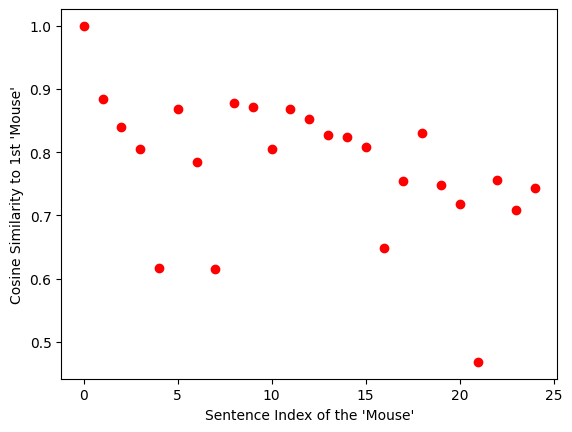

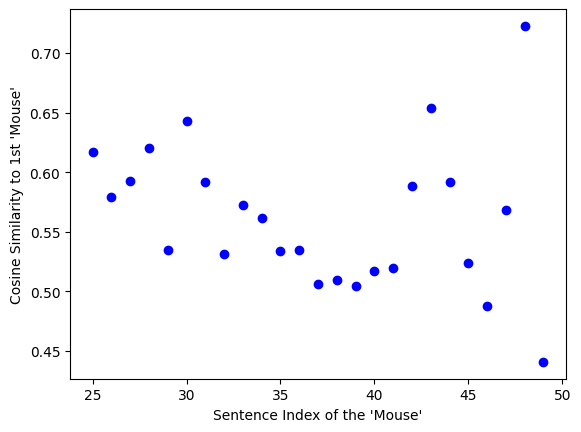

In [11]:
similarities = np.array(similarities)
sentence_numbers = np.array(sentence_numbers)

plt.scatter(sentence_numbers[:25], similarities[:25], color='red')
plt.xlabel("Sentence Index of the 'Mouse'")
plt.ylabel("Cosine Similarity to 1st 'Mouse'")
plt.show()

plt.scatter(sentence_numbers[25:], similarities[25:], color='blue')
plt.xlabel("Sentence Index of the 'Mouse'")
plt.ylabel("Cosine Similarity to 1st 'Mouse'")
plt.show()